100.0% , 17634946
4290867 max time
100.0% , 15006525
12242362 max time


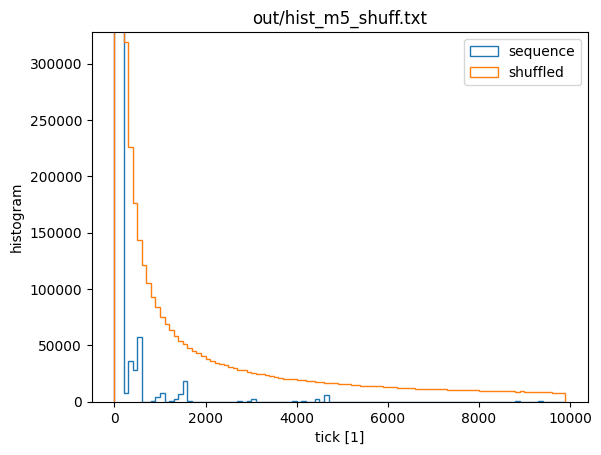

In [9]:
import matplotlib.pyplot as plt
import numpy as np

def plot_histogram_for_file(filename, cutoff_ticks=0, prob=False, label=None):
    timers, counters = load_histogram_from_file(filename)
    
    
    plt.title(filename)
    if cutoff_ticks:
        ix = timers < cutoff_ticks
    else:
        ix = timers >= 0
    
    print(f"{np.sum(counters[ix])/np.sum(counters)*100:.1f}% , {np.sum(counters)}")
    print(f"{np.max(timers)} max time")
    plt.xlabel("tick [1]")
    # plt.yscale('log')
    #plt.xscale('log')
    #plt.xlim((0, np.max(timers)/50))
    plt.ylim((0, np.max(counters)/10))
    #bins=None
    #bins = [0] + [1.3**e for e in range(10)]
    bins = [i*100 for i in range(100)]
    #bins = 100
    if prob:
        plt.ylabel("probability")
        plt.hist(timers[ix], weights=counters[ix], bins=bins, histtype='step', cumulative=True, density=True, label=label)
    else:
        plt.ylabel("histogram")
        plt.hist(timers[ix], weights=counters[ix], bins=bins, histtype='step', label=label)
        


def load_histogram_from_file(filename):
    dt_arr = [] 
    cnt_arr = []
    with open(filename) as h:
        it = iter(h)
        next(it)
        for line in it:
            dt, cnt = [int(p.strip()) for p in line.split()]
            dt_arr.append(dt)
            cnt_arr.append(cnt)
    timers = np.array(dt_arr)
    counters = np.array(cnt_arr)
    return timers, counters


_ct=None
_prob=False
plot_histogram_for_file("out/hist_m5.txt", cutoff_ticks=_ct, prob=_prob, label="sequence")
#plt.show()
plot_histogram_for_file("out/hist_m5_shuff.txt", cutoff_ticks=_ct, prob=_prob, label="shuffled")
#plt.show()
plt.legend(loc="upper right")
